# Iris Dataset Exploration and Machine Learning

This notebook explores the classic Iris dataset, prepares the data, builds a machine learning model

## 1. Setup and Data Loading

First, we'll import the necessary libraries and load the Iris dataset.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow
import mlflow.sklearn

# Configure plot style
plt.style.use('seaborn-v0_8-whitegrid')  # Updated style name for newer matplotlib
sns.set_palette("viridis")

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Add target names for better visualization
target_names = iris.target_names
y_names = pd.Series([target_names[i] for i in y], name='species')

# Create a combined DataFrame for easier exploration
iris_df = X.copy()
iris_df['target'] = y
iris_df['species'] = y_names

# Display the first few rows
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 2. Data Exploration

Let's explore the dataset to better understand its structure and characteristics.

In [4]:
# Basic information about the dataset
print("Dataset shape:", iris_df.shape)
print("\nBasic statistics:")
iris_df.describe()

Dataset shape: (150, 6)

Basic statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


C:\Users\T440\AppData\Local\Temp\ipykernel_2052\817167838.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=iris_df, palette='viridis')


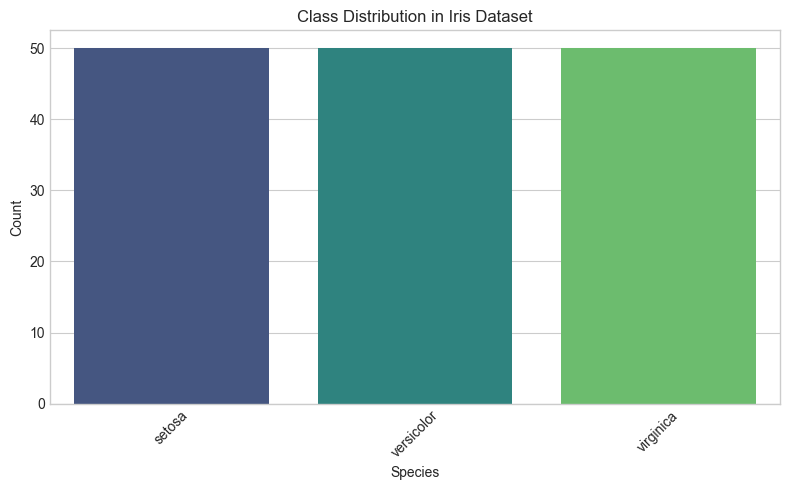

In [5]:
# Check class distribution
print("Class distribution:")
class_distribution = iris_df['species'].value_counts()
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=iris_df, palette='viridis')
plt.title('Class Distribution in Iris Dataset')
plt.ylabel('Count')
plt.xlabel('Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Check for missing values
print("Missing values per column:")
iris_df.isnull().sum()

Missing values per column:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

### Visualizing Feature Distributions

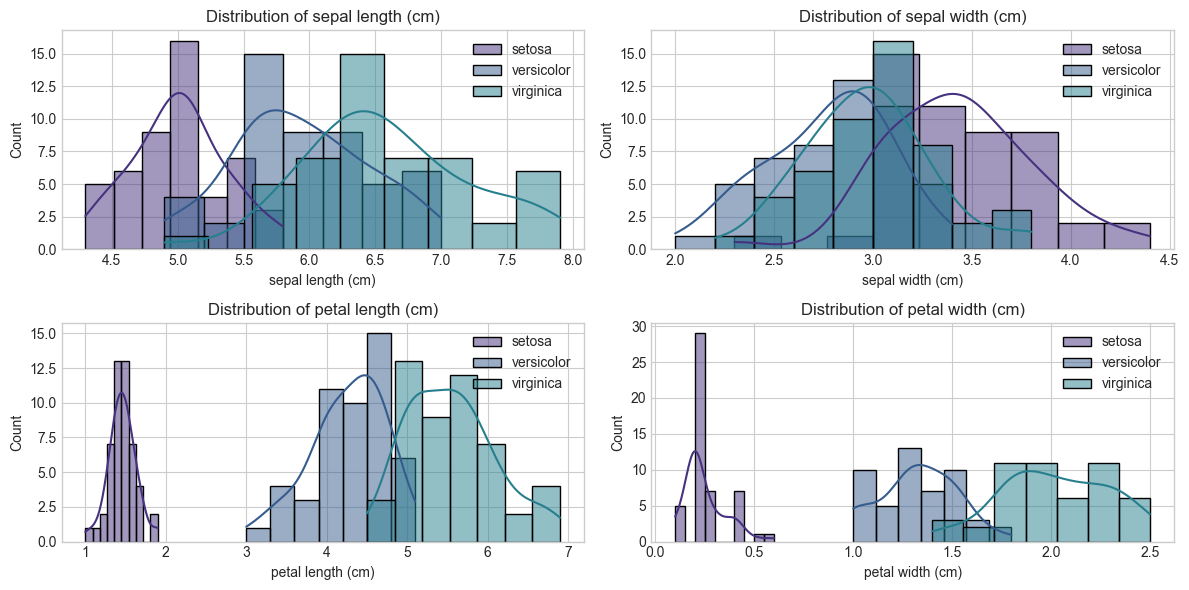

In [9]:
# Plot histograms for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in iris.target_names:
        subset = iris_df[iris_df['species'] == species]
        sns.histplot(subset[feature], kde=True, label=species)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()

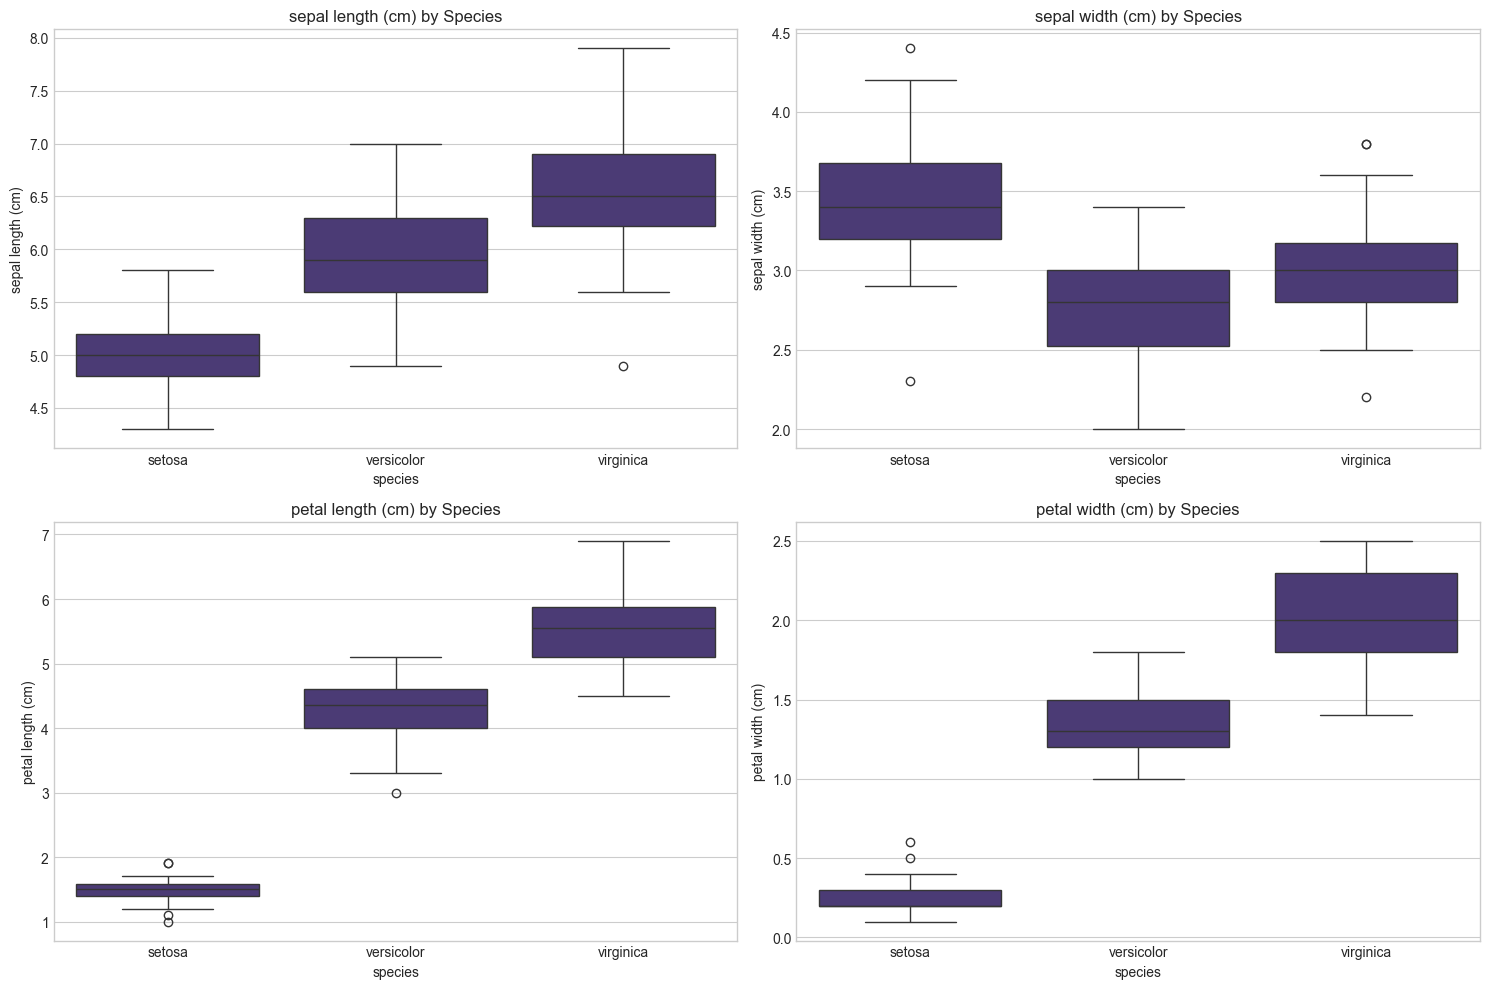

In [10]:
# Box plots to visualize feature distributions by species
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

### Correlation Analysis

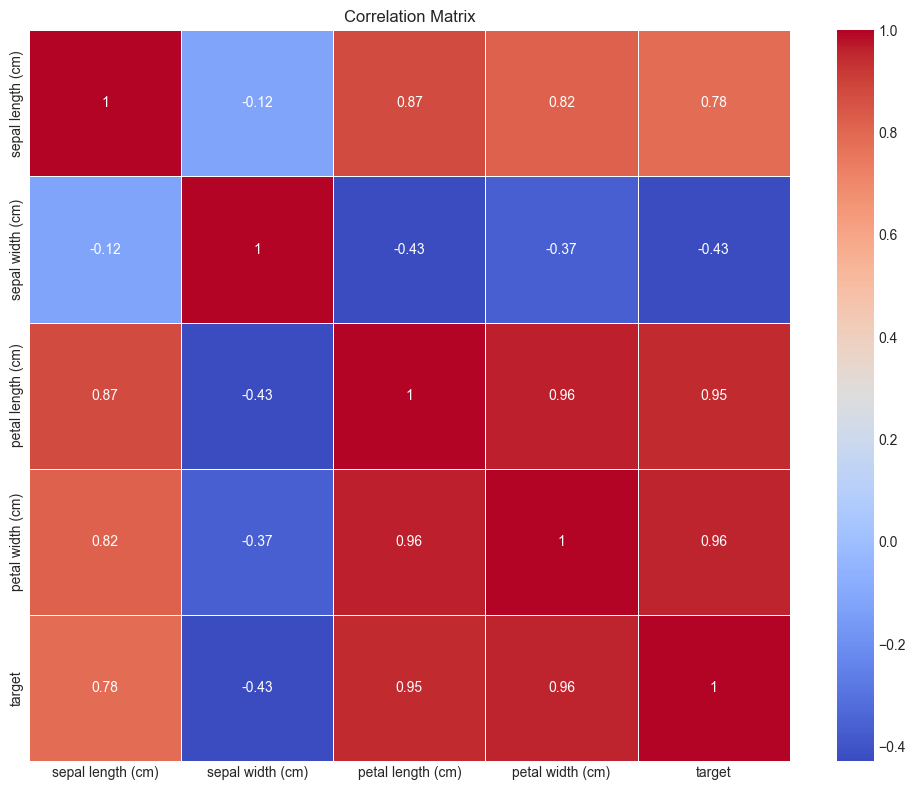

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation = iris_df.drop(['species'], axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

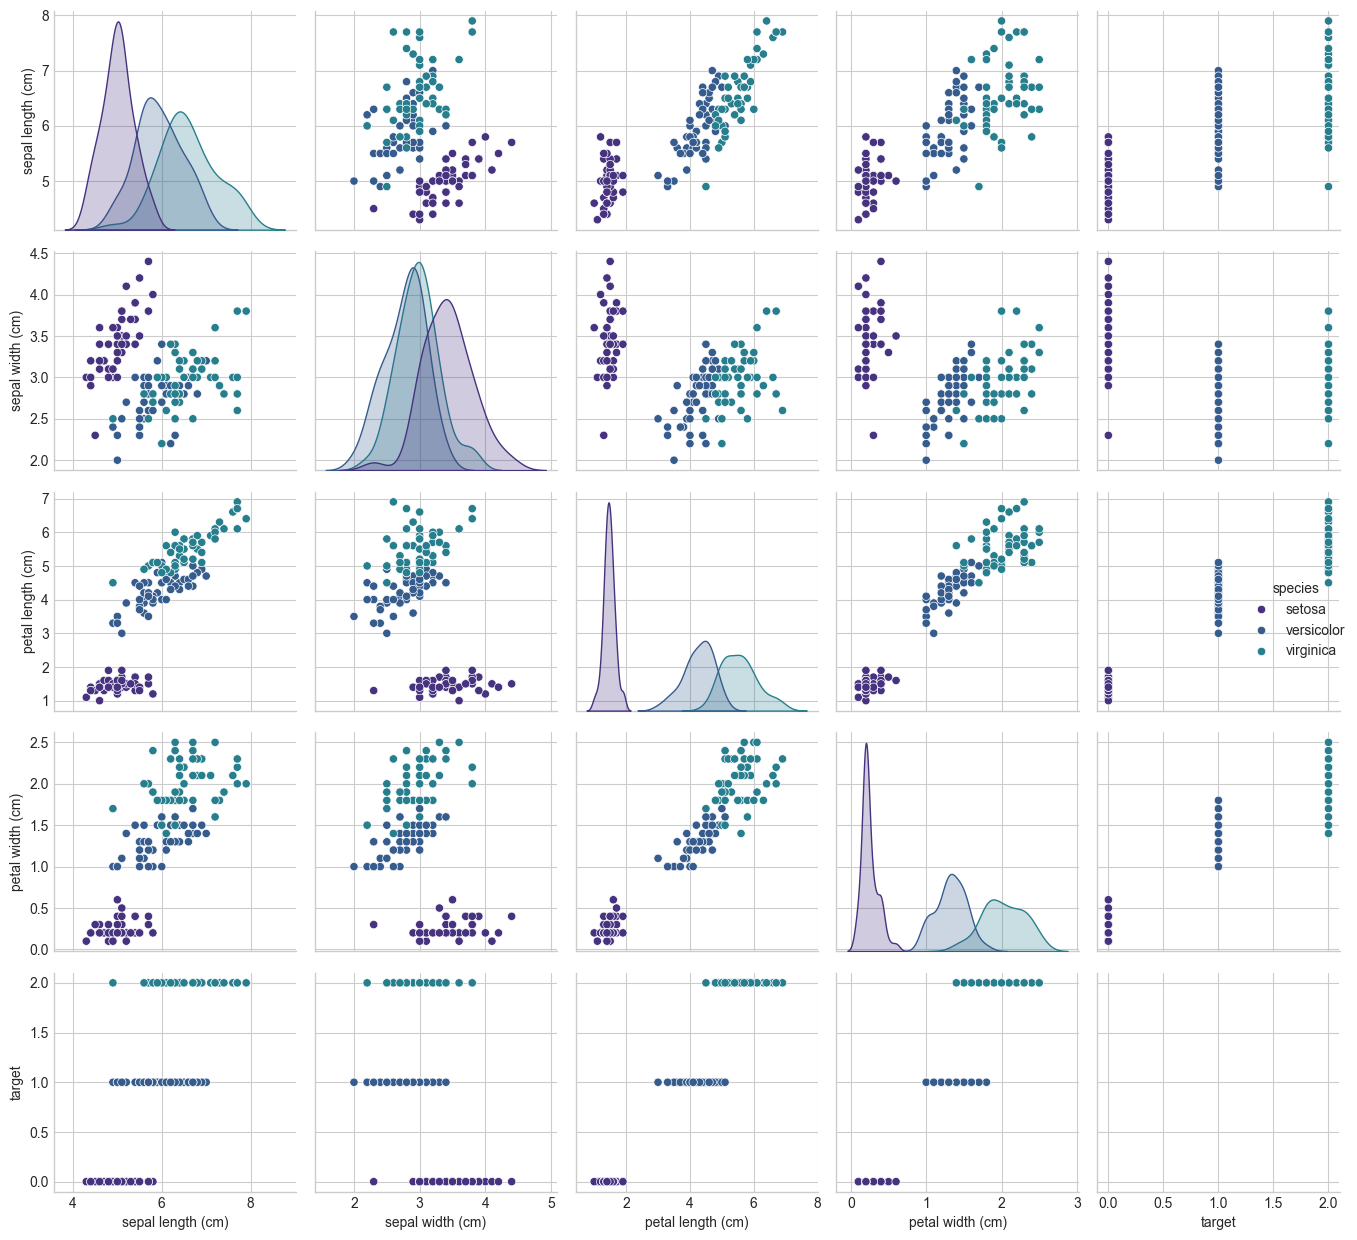

In [12]:
# Pairplot for multivariate analysis
plt.figure(figsize=(12, 10))
sns.pairplot(iris_df, hue='species', height=2.5)
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

The Iris dataset is already clean and structured, but we need to split it into training and testing sets.

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Verify stratification
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True).round(2))

print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True).round(2))

Training set shape: (120, 4), (120,)
Testing set shape: (30, 4), (30,)

Class distribution in training set:
target
0    0.33
2    0.33
1    0.33
Name: proportion, dtype: float64

Class distribution in test set:
target
0    0.33
2    0.33
1    0.33
Name: proportion, dtype: float64


## 4. Model Training and Evaluation

Let's train a Decision Tree classifier on the Iris dataset and evaluate its performance.

In [14]:
# Initialize and train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Model accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



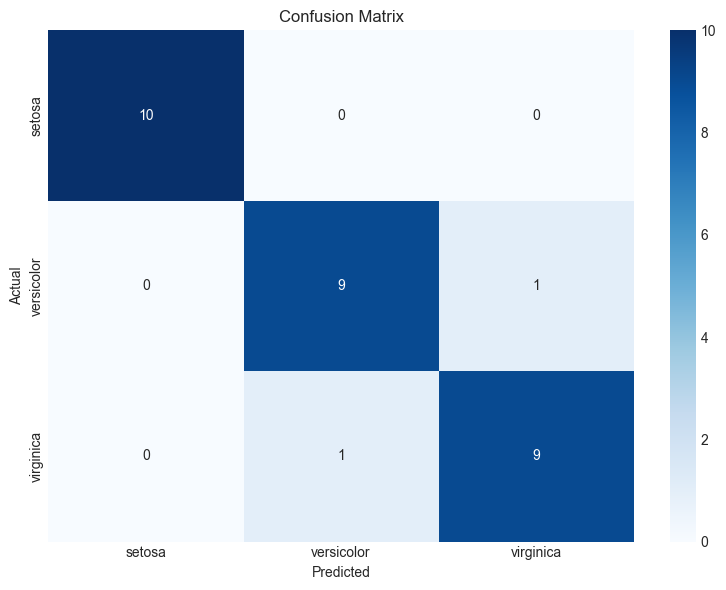

In [15]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

### Visualizing Decision Tree

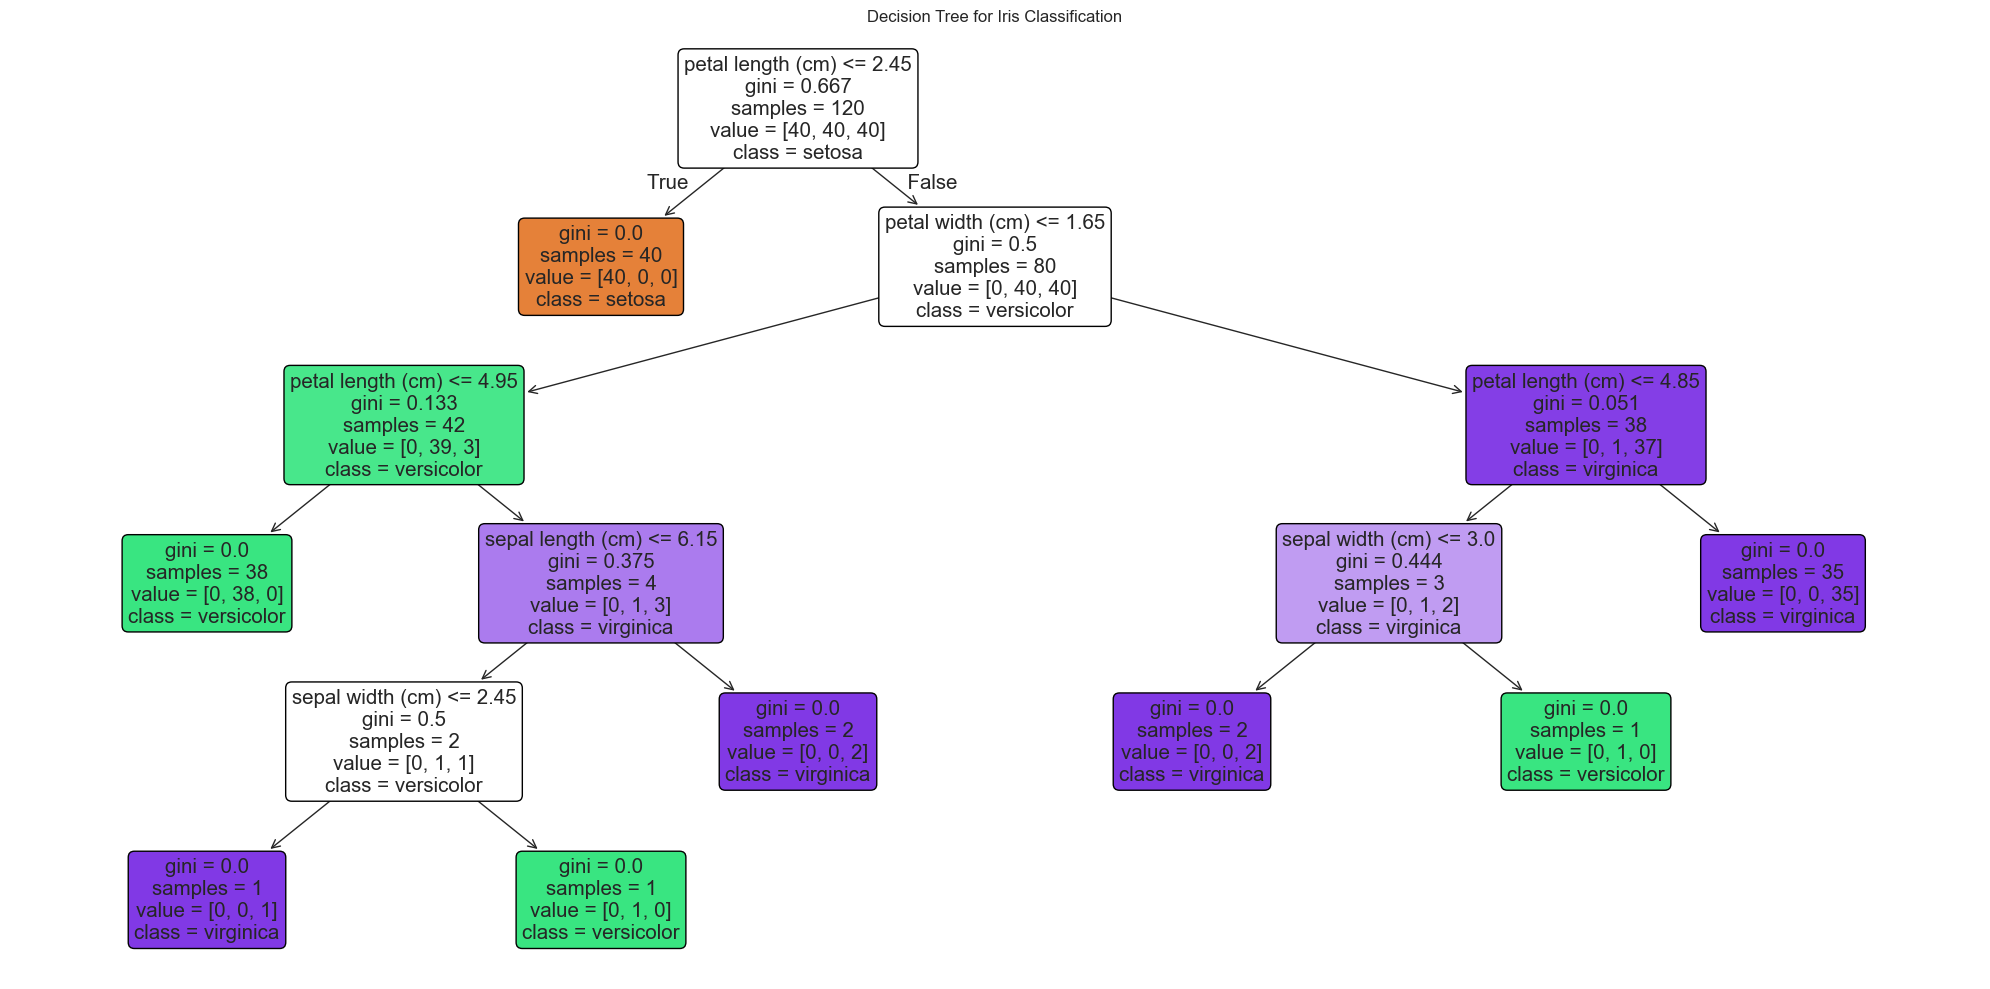

In [16]:
# Visualize the decision tree
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=iris.feature_names, 
               class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree for Iris Classification")
plt.tight_layout()
plt.show()

### Feature Importance

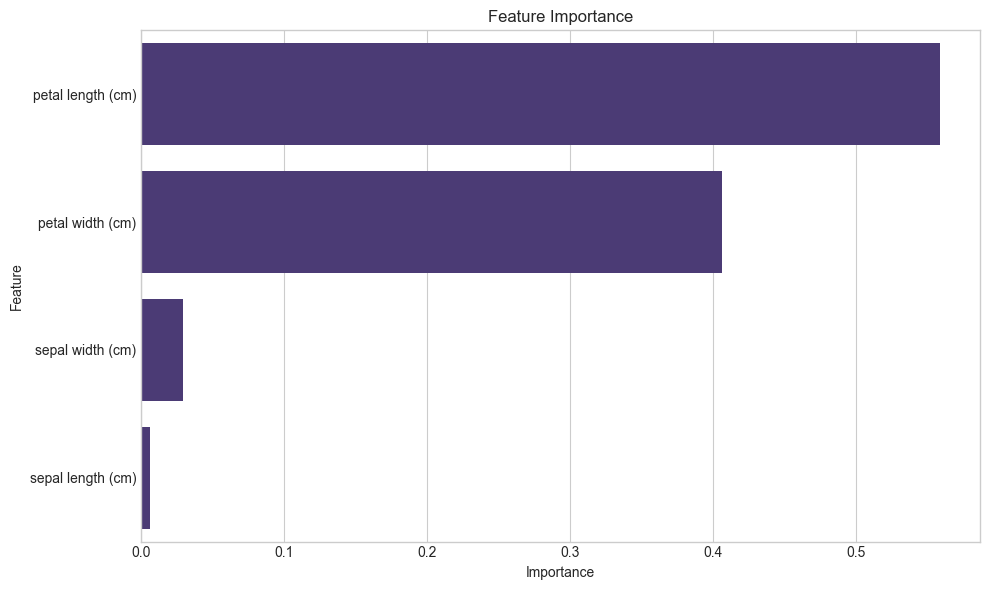

,Feature,Importance
2,petal length (cm),0.558568
3,petal width (cm),0.406015
1,sepal width (cm),0.029167
0,sepal length (cm),0.006250


In [17]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

feature_importance

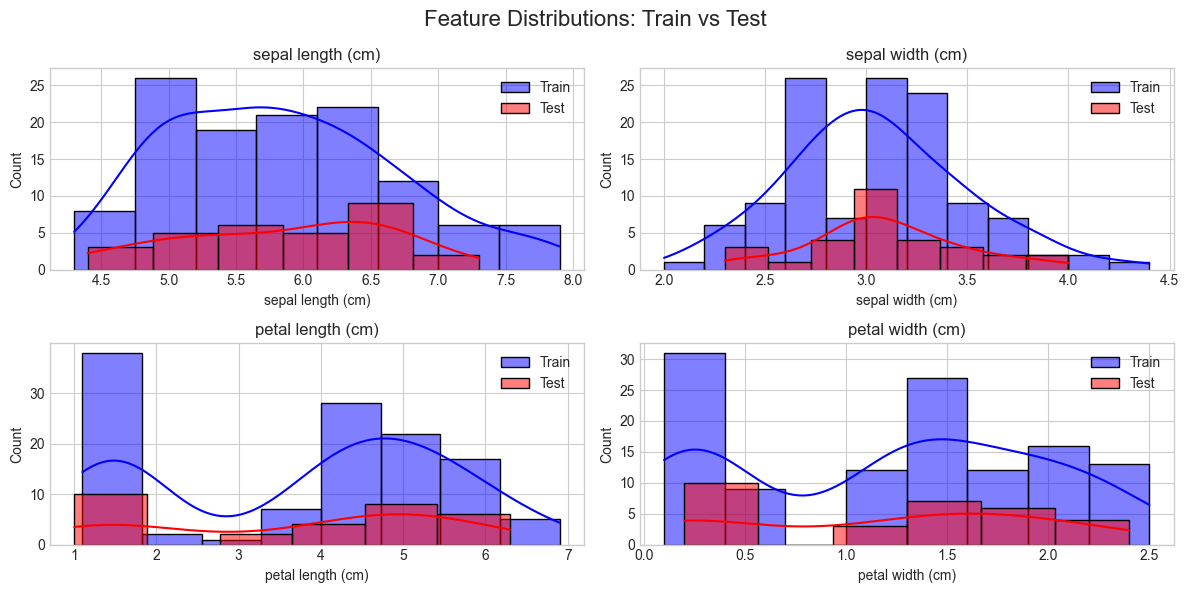

In [23]:
# Log visualizations
# Feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle("Feature Distributions: Train vs Test", fontsize=16)
axes = axes.flatten()

for i, feature in enumerate(iris.feature_names):
    sns.histplot(train_df[feature], kde=True, ax=axes[i], color="blue", label="Train", alpha=0.5)
    sns.histplot(test_df[feature], kde=True, ax=axes[i], color="red", label="Test", alpha=0.5)
    axes[i].set_title(feature)
    axes[i].legend()

plt.tight_layout()
run["visualizations/feature_distributions"].upload(fig)

## 7. Prediction Testing

Let's test the model with some sample data points.

In [25]:
# Create a function to make predictions
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = clf.predict(input_data)[0]
    species = iris.target_names[prediction]
    
    print(f"Input features: sepal_length={sepal_length}, sepal_width={sepal_width}, "
          f"petal_length={petal_length}, petal_width={petal_width}")
    print(f"Predicted class index: {prediction}")
    print(f"Predicted species: {species}")
    
    return prediction, species

In [26]:
# Test with a few samples
# Sample 1 - Expected: Setosa
predict_iris(5.1, 3.5, 1.4, 0.2)

Input features: sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2
Predicted class index: 0
Predicted species: setosa


c:\Users\T440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(np.int64(0), np.str_('setosa'))

In [27]:
# Sample 2 - Expected: Versicolor
predict_iris(6.3, 2.5, 4.9, 1.5)

Input features: sepal_length=6.3, sepal_width=2.5, petal_length=4.9, petal_width=1.5
Predicted class index: 1
Predicted species: versicolor


c:\Users\T440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(np.int64(1), np.str_('versicolor'))

In [28]:
# Sample 3 - Expected: Virginica
predict_iris(7.2, 3.2, 6.0, 1.8)

Input features: sepal_length=7.2, sepal_width=3.2, petal_length=6.0, petal_width=1.8
Predicted class index: 2
Predicted species: virginica


c:\Users\T440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(np.int64(2), np.str_('virginica'))